<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/Times_Arrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

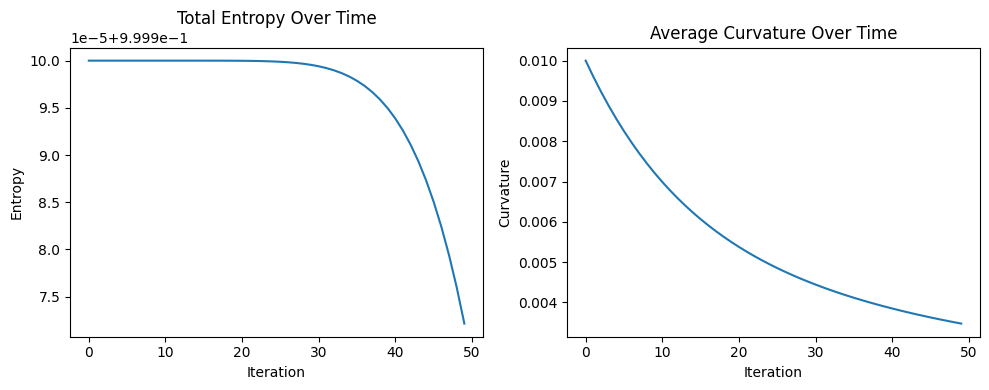

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Lattice size
size = 20
iterations = 50

# Initialize lattice: entropy, memory, curvature
entropy = np.zeros((size, size))
memory = np.ones((size, size))
curvature = np.zeros((size, size))

# Inject entropy spike at center
center = size // 2
entropy[center, center] = 1.0

def update(entropy, memory, curvature):
    new_entropy = entropy.copy()
    new_memory = memory.copy()
    new_curvature = curvature.copy()

    for i in range(1, size-1):
        for j in range(1, size-1):
            # Entropy diffusion
            neighbors = entropy[i-1:i+2, j-1:j+2]
            flux = np.mean(neighbors) - entropy[i, j]
            new_entropy[i, j] += 0.1 * flux

            # Memory decay
            new_memory[i, j] *= 0.99

            # Curvature proxy: local entropy gradient
            grad_x = entropy[i+1, j] - entropy[i-1, j]
            grad_y = entropy[i, j+1] - entropy[i, j-1]
            new_curvature[i, j] = np.sqrt(grad_x**2 + grad_y**2)

    return new_entropy, new_memory, new_curvature

total_entropy = []
average_curvature = []

for t in range(iterations):
    entropy, memory, curvature = update(entropy, memory, curvature)
    total_entropy.append(np.sum(entropy))
    average_curvature.append(np.mean(curvature))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(total_entropy)
plt.title("Total Entropy Over Time")
plt.xlabel("Iteration")
plt.ylabel("Entropy")

plt.subplot(1,2,2)
plt.plot(average_curvature)
plt.title("Average Curvature Over Time")
plt.xlabel("Iteration")
plt.ylabel("Curvature")

plt.tight_layout()
plt.show()

